# **Investigating Binary vs SVM Linear Classification**
By: Julia L. Wang

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 

Analyzing the iris dataset from sklearn by splitting the datapoints into training and testing sets with 80% of points in the test set. 

In [2]:
### initialization
logreg = LogisticRegression()
sc = StandardScaler()
iris = datasets.load_iris()
data = iris.get('data')
target = iris.get('target')

### split into training and testing set
x = [data[i][0:2] for i in range(100)]
y = [target[i] for i in range(100)]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=0)
x_train = np.array(x_train)
x_test = np.array(x_test)

### finding max and min values
x_0lowest = x_train.min(axis = 0)[0] #min(x_train[:, 0])
x_0max = x_train.max(axis = 0)[0] #max(x_train[:, 0])
x_1lowest = x_train.min(axis = 0)[1] #= min(x_train[:, 1])
x_1max = x_train.max(axis = 0)[1]# max(x_train[:, 1])


## Binary linear classification

Equation of decision boundary: y= 1.447681565061713 x - 4.794269115912029


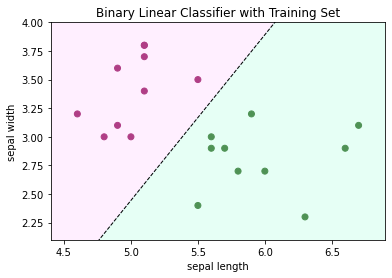

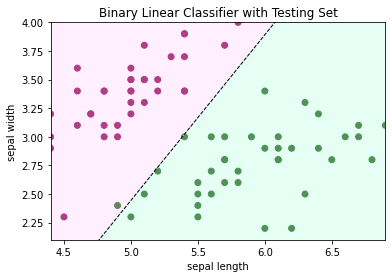

Accuracy of the classifier on the training set is:  1.0
Accuracy of the classifier on the test set is:  0.9875


In [3]:
### 1 Implementing binary linear classifier
bin_classifier = logreg.fit(x_train,y_train)
## w and b
w = bin_classifier.coef_[0]
b = bin_classifier.intercept_[0]

## decision boundary line equation y=ax+b
a = -w[0]/w[1]
xx = np.array([x_0lowest - 0.2, x_0max+0.2])
yy = a*xx - b/w[1]
print('Equation of decision boundary: y=', a, 'x -', b/w[1])

## plotting with training set
plt.figure()
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, cmap='PiYG') # data points in pink and green
plt.plot(xx, yy, 'k', lw=1, ls='--') # decision boundary line

# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Binary Linear Classifier with Training Set")
plt.fill_between(xx, 100, yy, color='#ffccff', alpha=0.3)
plt.fill_between(xx, -5, yy, color='#adffe0', alpha=0.3)
plt.show()

## plotting with testing set
plt.figure()
plt.scatter(x_test[:,0], x_test[:, 1], c=y_test, cmap='PiYG') # testing data points
plt.plot(xx, yy, 'k', lw=1, ls='--') # decision boundary line

# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Binary Linear Classifier with Testing Set")
plt.fill_between(xx, 100, yy, color='#ffccff', alpha=0.3)
plt.fill_between(xx, -5, yy, color='#adffe0', alpha=0.3)
plt.show()

### 2 Accuracy of binary linear classifier on the test and training set
print('Accuracy of the classifier on the training set is: ', bin_classifier.score(x_train, y_train))
print('Accuracy of the classifier on the test set is: ', bin_classifier.score(x_test, y_test))


## Linear SVM Classification

w is  [ 3.33266363 -3.33342658]  and bias is  -7.662778452658107
Equation of decision boundary: y= 0.9997711222645628 x - 2.2987692313248003
The value of the margin is 0.42430075463962524


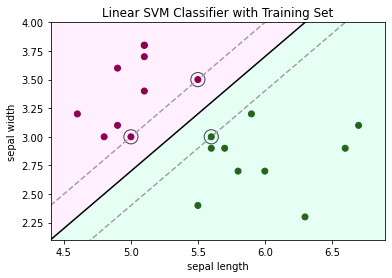

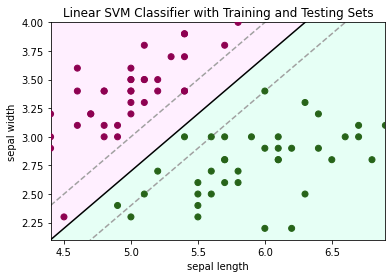

Accuracy of the classifier on the training set is:  1.0
Accuracy of the classifier on the test set is:  1.0


In [4]:
### 3 Implementing linear svm classifier
svm_clf = SVC(kernel='linear', C=100) # for hard margin
svm_clf.fit(x_train, y_train)

## w'x + b = 0
w = svm_clf.coef_[0] # w vector
b = svm_clf.intercept_[0] # b vector
print('w is ', w, ' and bias is ', b)

## decision boundary and margin lines
a = -w[0] / w[1] # slope
xx = np.linspace(x_0lowest-0.2, x_0max + 0.2) 
yy = a * xx- b/w[1]
print('Equation of decision boundary: y=', a, 'x -', b/w[1])

### 6 the value of the margin = 1 / np.sqrt(np.sum(svm_clf.coef_ ** 2))
margin = 1/np.linalg.norm(w)
print('The value of the margin is', margin*2)
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

### 7 the vector orthogonal to the decision boundary is w

## plotting with training set 
plt.figure()
# decision boundary and margins
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "#a1a1a1", linestyle='--')
plt.plot(xx, yy_up, color="#a1a1a1", linestyle='--')
# data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap='PiYG')

### 4 circling support vectors
plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], 
            s=200, linewidth=1, facecolors='none', edgecolors='k')

# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Linear SVM Classifier with Training Set")
plt.fill_between(xx, 100, yy, color='#ffccff', alpha=0.3)
plt.fill_between(xx, -5, yy, color='#adffe0', alpha=0.3)
plt.show()

## plotting with both training and testing set 
plt.figure()
# decision boundary and margins
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "#a1a1a1", linestyle='--')
plt.plot(xx, yy_up, color="#a1a1a1", linestyle='--')
# data points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, zorder=10, cmap='PiYG')
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap='PiYG')
# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Linear SVM Classifier with Training and Testing Sets")
plt.fill_between(xx, 100, yy, color='#ffccff', alpha=0.3)
plt.fill_between(xx, -5, yy, color='#adffe0', alpha=0.3)
plt.show()

### 5 Report accuracy on both training and test sets
print('Accuracy of the classifier on the training set is: ', svm_clf.score(x_train, y_train))
print('Accuracy of the classifier on the test set is: ', svm_clf.score(x_test, y_test))

### Identifying support vectors 
Using the duality theorem, we can change optimization problem from min to max problems. Rather than using the Lagrangian as in Problem 1, the KKT can be used. 

As such, the solution must satisfy the KKT conditions. One of these conditions is the *KKT dual complementarity condition* which implies that if $a_j>0$ then equation 1 (Problem 1 q3) is tight bound with an equality. Thus, it holds that the optimal margin classifier equation $y_j(w'x_j + b) <= 1$ has constraints $g_j(w) = -y_j (w'x_j + b) + 1 <=0$ where there is 1 constraint for each training example. 

Therefore, since support vectors have the smallest margins and are closest to the decision boundary, they are the only **training examples with corresponding nonzero a_j** at the optimal solution. 

### Value of the margin
The value of the margin is 2 divided by the norm of the w vector. The distance from one of the margin hyperplans to the decision boundary is $\frac{|w'x+b|}{\sqrt{\sum{w_j^2}}} = \frac{|w'x+b|}{||w||}$. Since we know that the equation of the hyperplanes are $w'x+b = -1$ for the negative class and 1 for the positive class, $|w'x+b|=1$, which means that the distance $\frac{|w'x+b|}{||w||}= \frac{1}{||w||}$. Therefore, the margin is 2 times that distance (adding distance to both hyperplanes) to make $\frac{2}{||w||}$. This came out to be 0.21215 by taking 2/np.linalg.norm(w)




## SVM with different test set sizes
Splitting the test size to be 40% rather than 80%. 

w is  [ 6.31804679 -5.26503723]  and bias is  -17.32197688065553
Equation of decision boundary: y= 1.2000004018019172 x - 3.2900008353678145


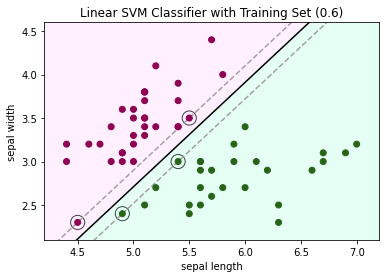

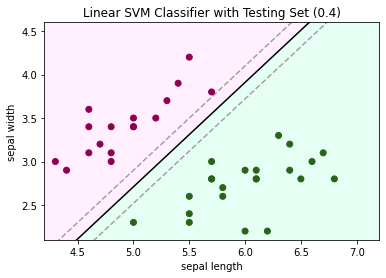

Accuracy of the classifier on the training set is:  1.0
Accuracy of the classifier on the test set is:  1.0


In [5]:
### 8 split into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)
x_train = np.array(x_train)
x_test = np.array(x_test)
### finding max and min values
x_0lowest = x_train.min(axis = 0)[0] 
x_0max = x_train.max(axis = 0)[0] 
x_1lowest = x_train.min(axis = 0)[1] 
x_1max = x_train.max(axis = 0)[1]

### Implementing linear svm classifier
svm_clf = SVC(kernel='linear', C=100) # for hard margin
svm_clf.fit(x_train, y_train)

## w'x + b = 0
w = svm_clf.coef_[0] # w vector
b = svm_clf.intercept_[0] # b vector
print('w is ', w, ' and bias is ', b)

## decision boundary and margin lines
a = -w[0] / w[1] # slope
xx = np.linspace(x_0lowest-0.2, x_0max + 0.2) 
yy = a * xx- b/w[1]
print('Equation of decision boundary: y=', a, 'x -', b/w[1])

### margin 
margin = 1/np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

## plotting with training set 
plt.figure()
# decision boundary and margins
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "#a1a1a1", linestyle='--')
plt.plot(xx, yy_up, color="#a1a1a1", linestyle='--')
# data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap='PiYG')

### 4 circling support vectors
plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='k')
# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Linear SVM Classifier with Training Set (0.6)")
plt.fill_between(xx, 100, yy, color='#ffccff', alpha=0.3)
plt.fill_between(xx, -5, yy, color='#adffe0', alpha=0.3)
plt.show()

## plotting with testing set 
plt.figure()
# decision boundary and margins
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "#a1a1a1", linestyle='--')
plt.plot(xx, yy_up, color="#a1a1a1", linestyle='--')
# data points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, zorder=10, cmap='PiYG')
# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Linear SVM Classifier with Testing Set (0.4)")
plt.fill_between(xx, 100, yy, color='#ffccff', alpha=0.3)
plt.fill_between(xx, -5, yy, color='#adffe0', alpha=0.3)
plt.show()

### 5 Report accuracy on both training and test sets
print('Accuracy of the classifier on the training set is: ', svm_clf.score(x_train, y_train))
print('Accuracy of the classifier on the test set is: ', svm_clf.score(x_test, y_test))

### Comparison between test set sizes
The decision boundary changed from approximately y= x - 2.3  to y= 1.2x - 3.3

However, the test accuracy for both cases is 1, meaning that the boundary correctly classified all points in the test set in both cases. This makes sense since adding additional points to train the model will make it more accurate, where the original accuracy was 100%. 

With the points that were previously in the test set now allocated to the training set, the size of the training set is increased. Of the newly included points, some could be closer to the decision boundary, where they act as new support vectors. For instance, say an additional data point from the positive (green) class is now in the training set, where it is located within the margin from the previous svm (a point to the left of the previous support vectors). This point can now contribute as a support vector, where the decision boundary shifts to center itself within the new margins created by these additional support vectors. As a result, some of the previous support vectors may or may not remain support vectors. This is illustrated in the plot above, where the training set plot displays different support vectors. 

### Binary linear classifier vs SVM decision boundary

Equation of binary decision boundary: y= 1.0481907378608937 x - 2.6124735115668547
Equation of SVM decision boundary: y= 1.2000004018019172 x - 3.2900008353678145
Not the same, visualization:


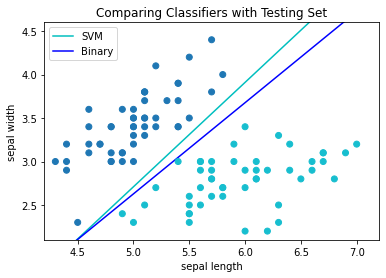

In [6]:
### 9 binary linear classifier vs SVM decision boundary
bin_classifier = logreg.fit(x_train,y_train)
## w and b
w_b = bin_classifier.coef_[0]
b_b = bin_classifier.intercept_[0]

## decision boundary line equation y=ax+b
a_b = -w_b[0]/w_b[1]
xx_b = np.array([x_0lowest - 0.2, x_0max+0.2])
yy_b = a_b*xx_b - b_b/w_b[1]
print('Equation of binary decision boundary: y=', a_b, 'x -', b_b/w_b[1])
print('Equation of SVM decision boundary: y=', a, 'x -', b/w[1])
print('Not the same, visualization:')

## plotting with testing set 
plt.figure()
# decision boundary and margins
plt.plot(xx, yy, "c", label='SVM')
plt.plot(xx_b, yy_b, "b", label='Binary')
# data points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, zorder=10, cmap='tab10')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap='tab10')
# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Comparing Classifiers with Testing Set")
plt.legend(loc="upper left")
plt.show()

## SVM with all 150 entries

w1 is  [-2.3  2.2]  and bias1 is  5.535003662109375
w2 is  [-2.15328895  1.53893944]  and bias2 is  7.3335292318323235
w3 is  [-1.36059082 -1.25839666]  and bias3 is  12.27887900246339
Equation of decision boundary 1: y= 1.0454545454545445 x - 2.515910755504262
Equation of decision boundary 2: y= 1.3992031764532937 x - 4.765313723193441
Equation of decision boundary 3: y= 1.0454545454545445 x - 5.58130863748336
The value of the margin 3 is 0.3141921118033477


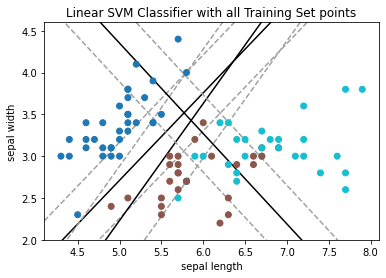

Accuracy of the classifier on the training set is:  0.8333333333333334
Accuracy of the classifier on the test set is:  0.7


In [7]:
## initialization]
x, y = datasets.load_iris(return_X_y=True)
x = x[:, :2]
y = y[:]

### split into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)
x_train = np.array(x_train)
x_test = np.array(x_test)

### finding max and min values
x_0lowest = x_train.min(axis = 0)[0] #min(x_train[:, 0])
x_0max = x_train.max(axis = 0)[0] #max(x_train[:, 0])
x_1lowest = x_train.min(axis = 0)[1] #= min(x_train[:, 1])
x_1max = x_train.max(axis = 0)[1]# max(x_train[:, 1])

## finding equations of decision boundaries
svm_clf = SVC(kernel='linear', C=1) # for hard margin
svm_clf.fit(x_train, y_train)

## w'x + b = 0
w = svm_clf.coef_ # w vector
w1, w2, w3 = w[0], w[1], w[2]
b = svm_clf.intercept_ # b vector
b1, b2, b3 = b[0],b[1], b[2]

print('w1 is ', w1, ' and bias1 is ', b1)
print('w2 is ', w2, ' and bias2 is ', b2)
print('w3 is ', w3, ' and bias3 is ', b3)

## 1 decision boundary and margin lines
a1 = -w1[0] / w1[1] # slope
xx1 = np.linspace(x_0lowest-0.2, x_0max + 0.2) 
yy1 = a1 * xx1- b1/w1[1]
print('Equation of decision boundary 1: y=', a1, 'x -', b1/w1[1])
## margin
margin1 = 1/np.linalg.norm(w1)
yy_down1 = yy1 - np.sqrt(1 + a1 ** 2) * margin1
yy_up1 = yy1 + np.sqrt(1 + a1 ** 2) * margin1

## 2 decision boundary and margin lines
a2 = -w2[0] / w2[1] # slope
xx2 = np.linspace(x_0lowest-0.2, x_0max + 0.2) 
yy2 = a2 * xx2- b2/w2[1]
print('Equation of decision boundary 2: y=', a2, 'x -', b2/w2[1])
## margin
margin2 = 1/np.linalg.norm(w2)
yy_down2 = yy2 - np.sqrt(1 + a2 ** 2) * margin2
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin2

## 3 decision boundary and margin lines
a3 = -w3[0] / w3[1] # slope
xx3 = np.linspace(x_0lowest-0.2, x_0max + 0.2) 
yy3 = a3 * xx3- b3/w3[1]
print('Equation of decision boundary 3: y=', a1, 'x -', b3/w1[1])
## 6 value of margin = 1 / np.sqrt(np.sum(svm_clf.coef_ ** 2))
margin3 = 1/np.linalg.norm(w1)
print('The value of the margin 3 is', margin3)
yy_down3 = yy3 - np.sqrt(1 + a3 ** 2) * margin3
yy_up3 = yy3 + np.sqrt(1 + a3 ** 2) * margin3

### plotting
plt.figure()
# data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=10, cmap='tab10')
# 1 decision boundary and margins
plt.plot(xx1, yy1, "k-")
plt.plot(xx1, yy_down1, "#a1a1a1", linestyle='--')
plt.plot(xx1, yy_up1, color="#a1a1a1", linestyle='--')
plt.plot(xx2, yy2, "k-")
plt.plot(xx2, yy_down2, "#a1a1a1", linestyle='--')
plt.plot(xx2, yy_up2, color="#a1a1a1", linestyle='--')
plt.plot(xx3, yy3, "k-")
plt.plot(xx3, yy_down3, "#a1a1a1", linestyle='--')
plt.plot(xx3, yy_up3, color="#a1a1a1", linestyle='--')


# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Linear SVM Classifier with all Training Set points")
plt.show()

## Accuracy
print('Accuracy of the classifier on the training set is: ', svm_clf.score(x_train, y_train))
print('Accuracy of the classifier on the test set is: ', svm_clf.score(x_test, y_test))

Since the 3 classes have intermingling points with each other and are mixed, it is not linearly separable. We can deal with it by using a different SVM classification. The 2 alternatives are RBF and polynomial kernels, where they both work better on non-linearly separable datasets. However, RBF has the advantage of being localized with finite response along the x-axis, utilizing minimal space as it only requires storage of support vectors.

Let's try using rbf and comparing the accuracies:

### New proposed classifier: rbf

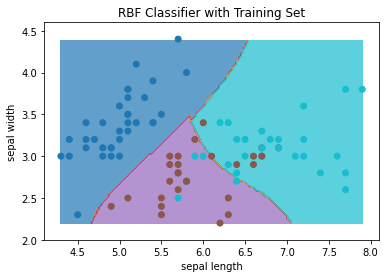

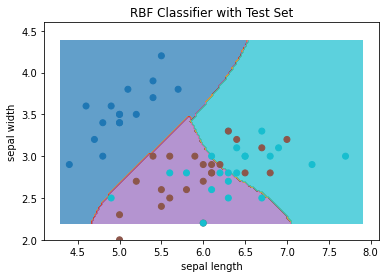

Accuracy of the classifier on the training set is:  0.8444444444444444
Accuracy of the classifier on the test set is:  0.7166666666666667


In [8]:
## initialization
x, y = datasets.load_iris(return_X_y=True)
x = x[:, :2]
y = y[:]
### split into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

x_train = np.array(x_train)
x_test = np.array(x_test)

### finding max and min values
x_0lowest = x_train.min(axis = 0)[0] #min(x_train[:, 0])
x_0max = x_train.max(axis = 0)[0] #max(x_train[:, 0])
x_1lowest = x_train.min(axis = 0)[1] #= min(x_train[:, 1])
x_1max = x_train.max(axis = 0)[1]# max(x_train[:, 1])

## Implementing rbf svm classifier
svm_clf = SVC(kernel='rbf', C=1, gamma=1, random_state=0) # for hard margin
svm_clf.fit(x_train, y_train)

## Plotting with training set
plt.figure()
# data points
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, zorder=10, cmap='PiYG')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.tab10, zorder=10) #coolwarm)
xx, yy = np.meshgrid(np.arange(x_0lowest, x_0max, 0.02), np.arange(x_1lowest, x_1max, 0.02))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.7)
# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("RBF Classifier with Training Set")
plt.show()

## Plotting with test set
plt.figure()
# data points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.tab10, zorder=10) #coolwarm)
xx, yy = np.meshgrid(np.arange(x_0lowest, x_0max, 0.02), np.arange(x_1lowest, x_1max, 0.02))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.7)
# styling
plt.xlim([x_0lowest-0.2, x_0max+0.2])
plt.ylim([x_1lowest-0.2, x_1max+0.2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("RBF Classifier with Test Set")
plt.show()

print('Accuracy of the classifier on the training set is: ', svm_clf.score(x_train, y_train))
print('Accuracy of the classifier on the test set is: ', svm_clf.score(x_test, y_test))

The accuracy of the SVC rbf classifier is higher on both the training and test sets compared to the SVC linear classifier. Therefore, the rbf deals with non linearly separable data better. 